<a href="https://colab.research.google.com/github/Vputri/Teknik-Kompilasi/blob/main/Teknik_Kompilasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Program Finite Automata**

# **1. String Bilangan Genap**
L(G1) = { 2, 4, 6, 8, 10, 12,..,18, 20, ..., 98, 100, 102,....., 998, 1000, 1002,...}

In [1]:
inputan = input("Masukkan inputan : ")#pisahkan dengan spasi misal 1002 20
inputan = list(inputan.split(' '))
hasil = []

for i in inputan:
  if int(i)%2 == 0:
    hasil.append(i)

if (len(hasil) == len(inputan)):
  print("ACCEPTED")
else:
  print("NOT ACCEPTED")

Masukkan inputan : 10 100 100
ACCEPTED


# **2. String Bilangan String Ganjil**
L(G2) = { 1, 3, 5, 7, 9, 111,..,17, 19, ..., 97, 99, 101,....., 997, 999, 1001,... }

In [2]:
inputan = input("Masukkan inputan : ")#pisahkan dengan spasi misal 99 101
inputan = list(inputan.split(' '))
hasil = []

for i in inputan:
  if int(i)%2 == 1:
    hasil.append(i)

if (len(hasil) == len(inputan)):
  print("ACCEPTED")
else:
  print("NOT ACCEPTED")

Masukkan inputan : 11 101 1001
ACCEPTED


# **3. String Nama-Nama Mahasiswa Kelas 3IA88**
L(G3) = {ARDI, BILI, BILAL, CICI, DATUL, DIYANK, FARELL, FATONI, FATTAH, GIO, KHALIF, LUTHFI, MAUL, NARIS, RIFQY, REKSA, RAY, SISY, VIKA, YAZID,
ZIDAN }

In [3]:
inputan = input("Masukkan inputan : ")#pisahkan dengan spasi misal cici sisy
inputan = list(inputan.split(' '))
kamus = ['ARDI', 'BILI', 'BILAL', 'CICI', 'DATUL', 'DIYANK', 'FARELL', 'FATONI', 'FATTAH', 'GIO', 
         'KHALIF', 'LUTHFI', 'MAUL', 'NARIS', 'RIFQY', 'REKSA', 'RAY', 'SISY', 'VIKA', 'YAZID', 'ZIDAN']
hasil = []

for i in inputan:
  if i.upper() in kamus:
    hasil.append(i)

if (len(hasil) == len(inputan)):
  print("ACCEPTED")
else:
  print("NOT ACCEPTED")

Masukkan inputan : cici sisy
ACCEPTED


# **4. String Kalimat**
L(G4) = { (ab;) n ⎹ n > 0 } = { ab, abab, ababab, ......}

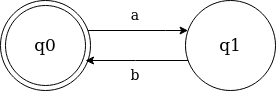

In [4]:
def start(c): 
    if (c == 'a'): 
        dfa = 1 
    else: 
        dfa = -1
    return dfa 
  
def state1(c):  
    if (c == 'b'): 
        dfa = 0
    else: 
        dfa = -1
    return dfa 
  
def cek(String): 
    l = len(String) 
    dfa = 0
    for i in range(l):  
        if (dfa == 0):  
            dfa = start(String[i])  
        elif (dfa == 1):  
            dfa = state1(String[i])   

    if (dfa == 0) : 
        print("ACCEPTED") 
    else: 
        print("NOT ACCEPTED")
   
cek("a")
cek("b") 
cek("ab")  
cek("abab") 
cek("ababab") 

NOT ACCEPTED
NOT ACCEPTED
ACCEPTED
ACCEPTED
ACCEPTED


# **5. String Kalimat**
L(G5) = { 01(ab)*10 ⎹ n > 0 } = { 01ab10, 01abab10, 01ababab10,...
}

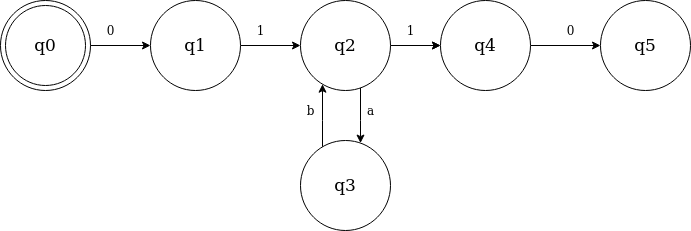

In [5]:
def start(c): 
    if (c == '0'): 
        dfa = 1 
    else: 
        dfa = -1
    return dfa 
  
def state1(c):  
    if (c == '1'): 
        dfa = 2
    else: 
        dfa = -1
    return dfa 
  
def state2(c): 
    if (c == '1'): 
        dfa = 4
    elif (c == 'a'): 
        dfa = 3
    else: 
        dfa = -1
    return dfa 
   
def state3(c): 
    if (c == 'b'): 
        dfa = 2
    else: 
        dfa = -1
    return dfa 
  
def state4(c): 
    if (c == '0'): 
        dfa = 5
    else: 
        dfa = -1
    return dfa 
  
def cek(String): 
    l = len(String) 
    dfa = 0
    for i in range(l):  
        if (dfa == 0):  
            dfa = start(String[i])  
        elif (dfa == 1):  
            dfa = state1(String[i])  
        elif (dfa == 2) : 
            dfa = state2(String[i])  
        elif (dfa == 3) : 
            dfa = state3(String[i])  
        elif (dfa == 4) : 
            dfa = state4(String[i])  

    if (dfa == 5) : 
        print("ACCEPTED") 
    else: 
        print("NOT ACCEPTED")
   
cek("0110") 
cek("01a10") 
cek("01b10") 
cek("01ab10") 
cek("01aba10") 
cek("01abb10") 
cek("01abab10") 

ACCEPTED
NOT ACCEPTED
NOT ACCEPTED
ACCEPTED
NOT ACCEPTED
NOT ACCEPTED
ACCEPTED
